In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Plotting the relationship between each variables:

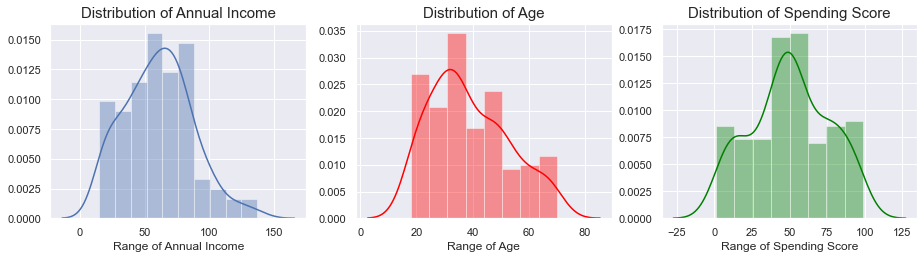

In [3]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(13,10))
plt.subplot(3,3,1)
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 15)
plt.xlabel('Range of Annual Income')

plt.subplot(3,3,2)
sns.distplot(dataset['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')

plt.subplot(3,3,3)
sns.distplot(dataset['Spending Score (1-100)'], color = 'green')
plt.title('Distribution of Spending Score', fontsize = 15)
plt.xlabel('Range of Spending Score')
plt.tight_layout()
plt.savefig('Feature distribution.jpeg')


Clustering with Annual Income and Spending Score:

In [4]:
x = dataset.iloc[:, 3:].values

scaler = StandardScaler()
X = scaler.fit_transform(x)

Plotting the values:

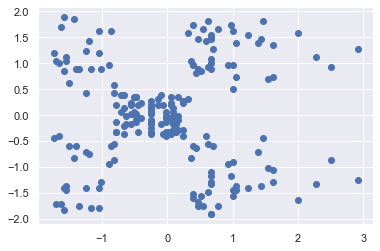

In [5]:
plt.scatter(X[:,0], X[:,1])

Finding K value with Elbow method:

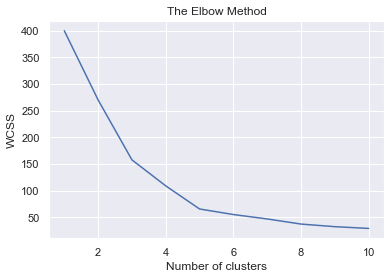

In [6]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Creating a model with K=5:

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit_predict(X)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [8]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 2 4 1 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]
[[-1.32954532  1.13217788]
 [-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [ 0.99158305  1.23950275]]


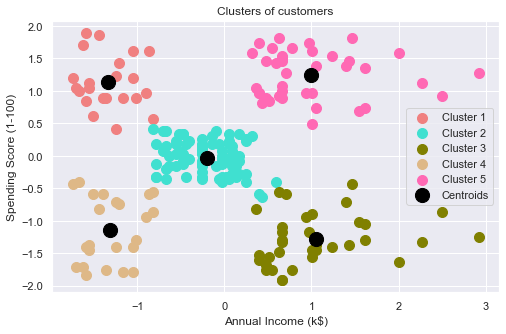

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(X[kmeans.labels_== 0][:,0], X[kmeans.labels_== 0][:,1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X[kmeans.labels_== 1][:,0], X[kmeans.labels_== 1][:,1], s = 100, c = 'turquoise', label = 'Cluster 2')
plt.scatter(X[kmeans.labels_== 2][:,0], X[kmeans.labels_== 2][:,1], s = 100, c = 'olive', label = 'Cluster 3')
plt.scatter(X[kmeans.labels_== 3][:,0], X[kmeans.labels_== 3][:,1], s = 100, c = 'burlywood', label = 'Cluster 4')
plt.scatter(X[kmeans.labels_== 4][:,0], X[kmeans.labels_== 4][:,1], s = 100, c = 'hotpink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig("Annual Income Vs Spending Score.jpeg")
plt.show()

Clustering with Age and Spending Score:

In [10]:
x1 = dataset.iloc[:, [2,4]].values

scaler = StandardScaler()
X1 = scaler.fit_transform(x1)

Plotting the values:

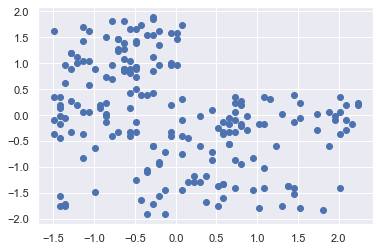

In [11]:
plt.scatter(X1[:,0], X1[:,1])

Finding K value with Elbow method:

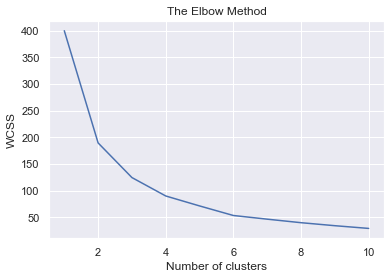

In [12]:
wcss1=[]
for i in range (1,11):
    km = KMeans(n_clusters=i,random_state=42)
    km.fit(X1)
    wcss1.append(km.inertia_)
plt.plot(range(1,11),wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Creating a model with K=4:

In [13]:
km = KMeans(n_clusters=4, random_state=42)
km.fit_predict(X1)

array([3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 3, 3, 3, 2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 1, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1])

In [14]:
print(km.labels_)
print(km.cluster_centers_)

[3 1 3 1 3 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 3 1 2 1 2 1 0 1 2 3 3 3 2 1 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 1 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 1 1 3 1 0 1 0 1 0 1 3 1 3 1 0 1 3 1 0 1 3 1 3 1 2 1
 3 1 0 1 0 1 0 1 0 1 0 1 2 1 3 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 3
 1 0 1 0 1 3 1 0 1 0 1 0 1 3 1]
[[ 0.62833625 -1.36651894]
 [-0.61415725  1.14971545]
 [ 1.22927178 -0.06558366]
 [-0.8346466  -0.39442706]]


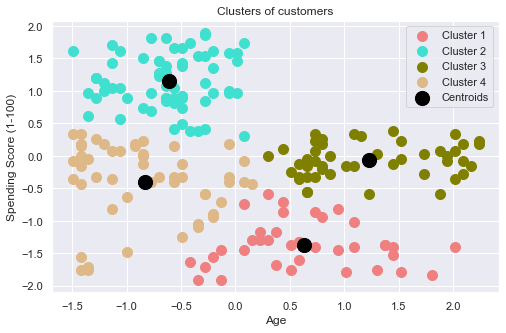

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(X1[km.labels_== 0][:,0], X1[km.labels_== 0][:,1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X1[km.labels_== 1][:,0], X1[km.labels_== 1][:,1], s = 100, c = 'turquoise', label = 'Cluster 2')
plt.scatter(X1[km.labels_== 2][:,0], X1[km.labels_== 2][:,1], s = 100, c = 'olive', label = 'Cluster 3')
plt.scatter(X1[km.labels_== 3][:,0], X1[km.labels_== 3][:,1], s = 100, c = 'burlywood', label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig("Age Vs Spending Score")
plt.show()